# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data.columns = [col.lower().replace(' ', '_')  for col in data.columns]

In [4]:
categoricals = data.select_dtypes(np.object)
categoricals.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

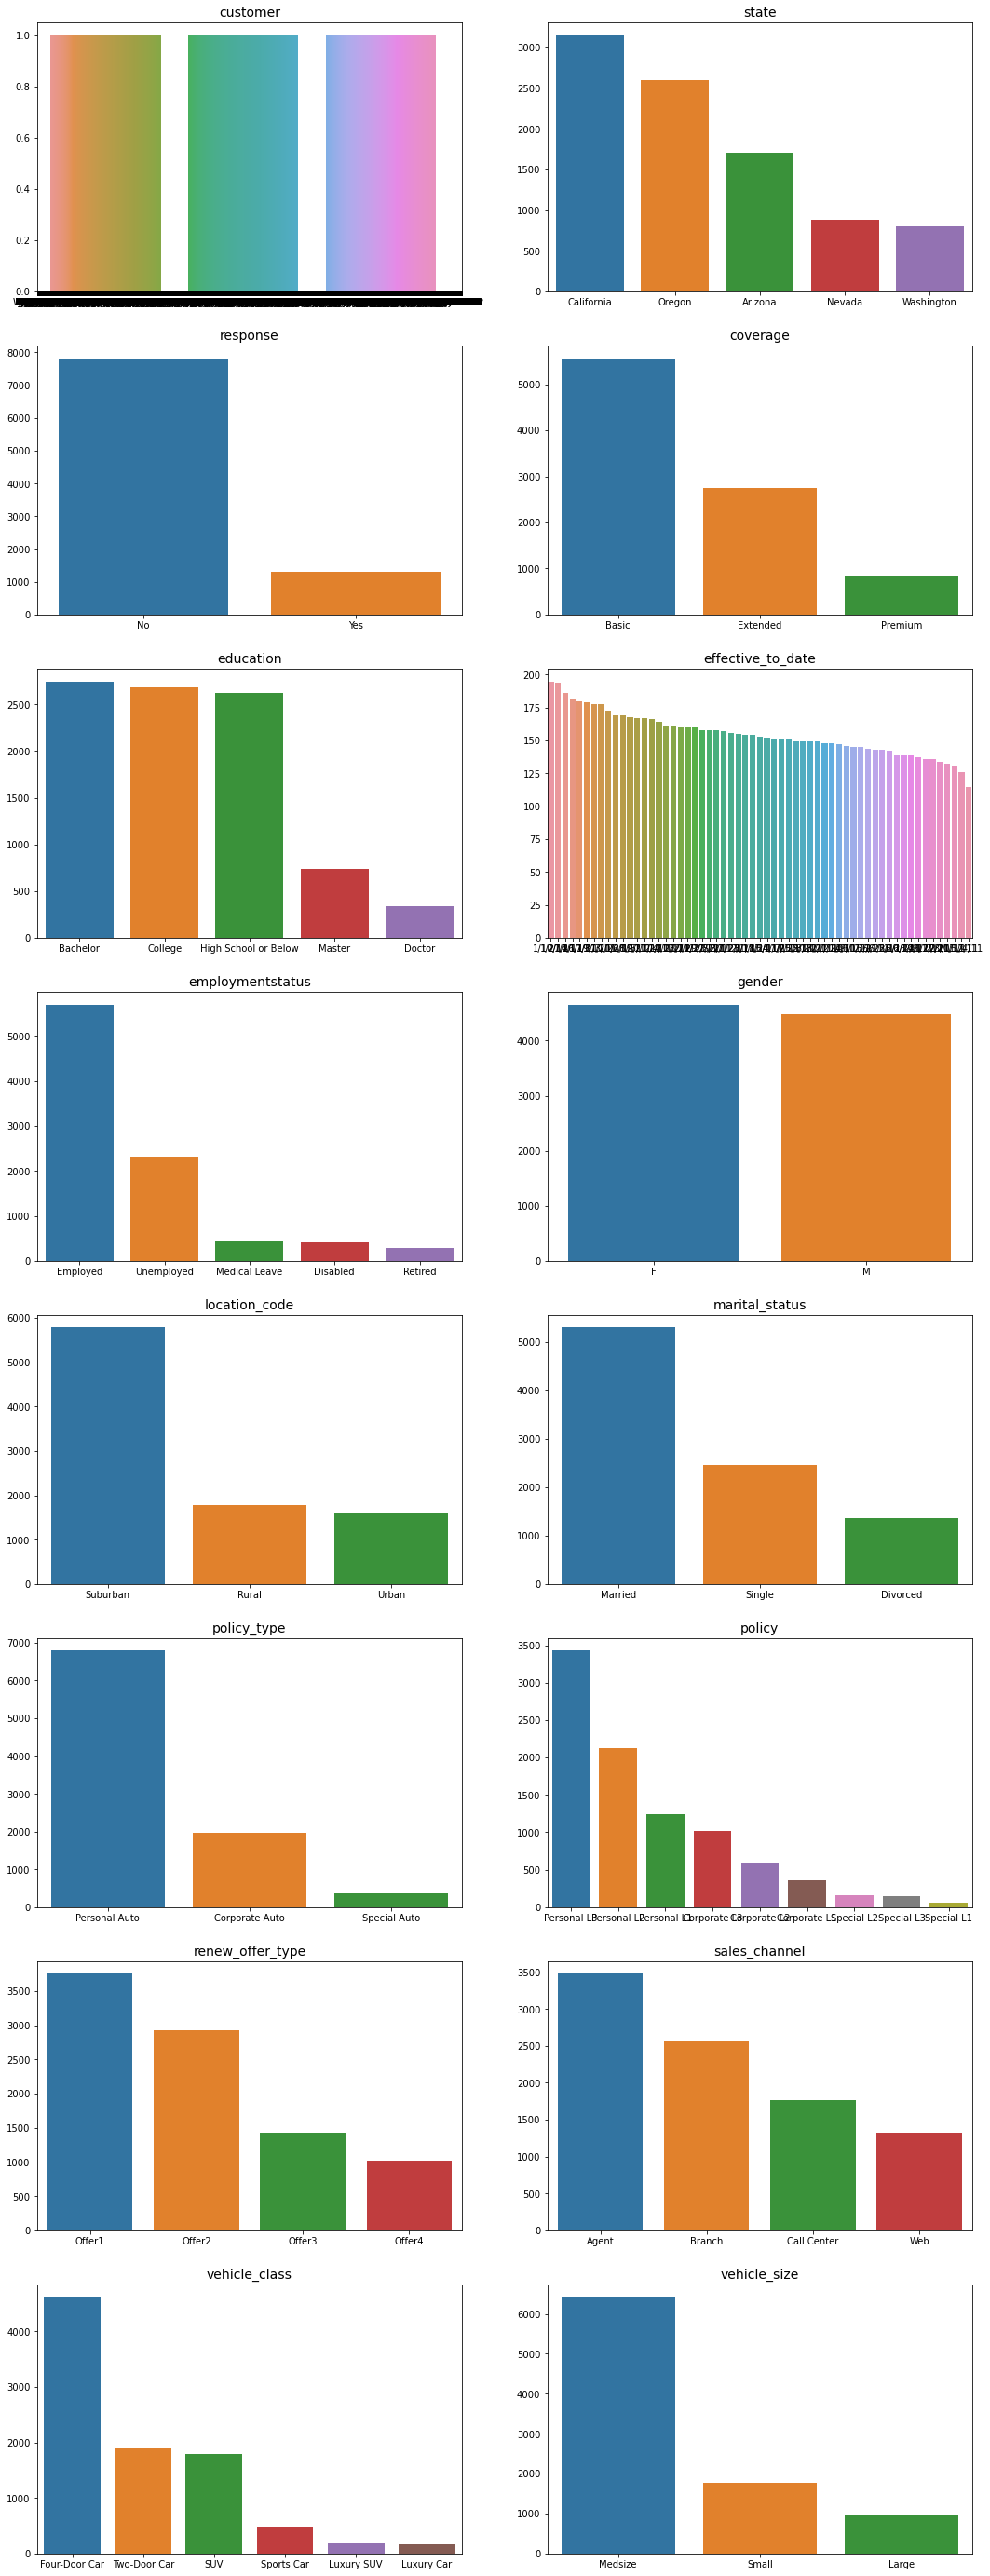

In [5]:
f, axes = plt.subplots(int(categoricals.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categoricals):

    sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

<AxesSubplot:ylabel='policy'>

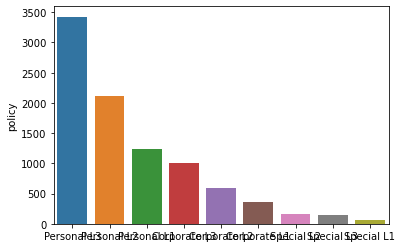

In [6]:
sns.barplot(x = categoricals["policy"].value_counts().index, y = categoricals["policy"].value_counts())

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [7]:
# Check policy
categoricals["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [8]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [9]:
L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [10]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [11]:
categoricals["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [12]:
categoricals["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [13]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [14]:
categoricals["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

4. Plot time variable. Can you extract something from it?

In [15]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

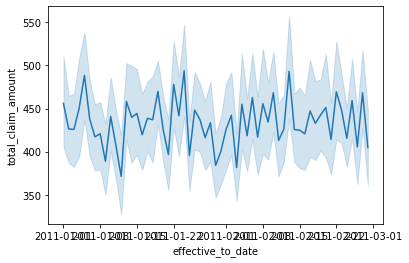

In [16]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = data)

In [17]:
time_df = pd.DataFrame()
time_df["day"] = data["effective_to_date"].dt.day
time_df["week"] = data["effective_to_date"].dt.week
time_df["month"] = data["effective_to_date"].dt.month
time_df["target"] = data["total_claim_amount"]

In [18]:
time_df['month'].unique()

array([2, 1], dtype=int64)

<AxesSubplot:xlabel='month', ylabel='target'>

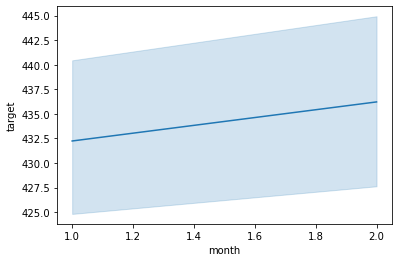

In [19]:
sns.lineplot(x="month", y="target", data = time_df)